In [106]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.fft import *

In [107]:
A = 2
T = 2
freq = 1 / T
w = 2 * np.pi * freq

In [108]:
def impulse(t):
    if t % 2 < 1:
        return A
    else:
        return -A

In [109]:
def calc_a0(func,t):
    I = quad(func, t, t+T)
    return (2/T*I[0])

def calc_an(func,t, n):
    I = quad(lambda t: func(t)* math.cos(n*w*t), t, t+T)
    return (2/T*I[0])

def calc_bn(func,t,n):
    I = quad(lambda t: func(t) * math.sin(n*w*t), t, t+T)
    return (2/T*I[0])

In [110]:
def func_approx(func,t):
    res = 0
    a0 = calc_a0(func,t)
    for n in range(1,11):
        res += calc_an(func,t,n) * math.cos(n * w * t) + calc_bn(func,t,n) * math.sin(n * w * t)
    return a0/2 + res

def plot_approximation(func, x0=-4, x1=4):
    x_values = np.linspace(x0, x1, 1000)
    y_impulses_list, y_approx_list, y_errors_list = [], [], []

    fig, axs = plt.subplots(2, 1)

    for x in x_values:
        y_func = func(x)
        y_approx = func_approx(func, x)
        y_impulses_list.append(y_func)
        y_approx_list.append(y_approx)
        y_errors_list.append(y_approx - y_func)

    print(y_approx_list)

    axs[0].plot(x_values, y_impulses_list)
    axs[0].plot(x_values, y_approx_list)
    axs[1].plot(x_values, y_errors_list)
    axs[0].set_ylabel('Амплитуда')
    axs[1].set_ylabel('Ошибка')
    plt.xlabel('Время, с')
    plt.show()
    return x_values, y_impulses_list, y_approx_list

C:\Users\User\AppData\Local\Temp\ipykernel_14560\2392276340.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(func, t, t+T)
C:\Users\User\AppData\Local\Temp\ipykernel_14560\2392276340.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  o

[1.2468448982286762e-14, 0.31919958971022516, 0.6317711146530615, 0.9313523444990242, 1.211974181752444, 1.4684872689076474, 1.696563042000729, 1.8928218187051202, 2.0550692659149408, 2.1823748800222473, 2.2748011220223976, 2.333736808752081, 2.3614812432652643, 2.3612239076970583, 2.337287550679397, 2.293951641993221, 2.236266263107955, 2.1692104714231615, 2.0978216450109324, 2.026745110670846, 1.9602035263345736, 1.9016645949829112, 1.854028757008828, 1.819242154142154, 1.7984121251023335, 1.7917818405094126, 1.7981958182795976, 1.818084955601779, 1.8477767048719074, 1.8854428254983395, 1.9283529456012685, 1.973622234399521, 2.018345498448584, 2.0599262712433717, 2.0958792192365245, 2.1242915049493303, 2.1437428923656396, 2.153400623687049, 2.153043428724945, 2.1430521734708963, 2.124389019246393, 2.098413995095568, 2.0670099702048335, 2.032240810802319, 1.9963370395554692, 1.961537878244542, 1.929960303460568, 1.9034783502775694, 1.8836182103993464, 1.8714758497220474, 1.86766067545

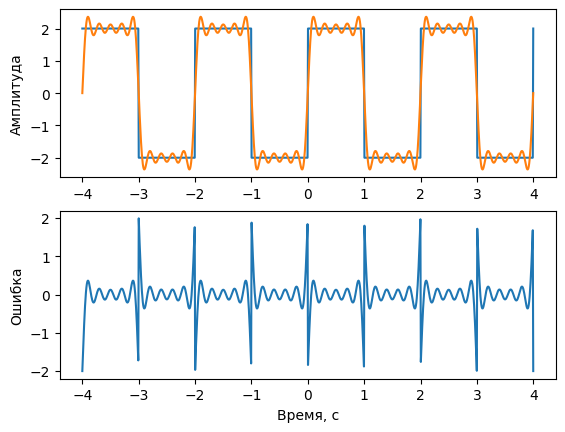

In [111]:
impulseX_vals, impulseY_vals, impulse_vals_approx = plot_approximation(impulse)

[1.999999999999998, 1.617294296667506, 0.6156408420332562, -0.621621874051542, -1.6209863536205862, -1.999990110634889, -1.6135862457006453, -0.6096537217179029, 0.6275967586241523, 1.62466238004777, 1.9999604426373592, 1.6098622373902753, 0.6036605723143145, -0.6335654366632831, -1.6283223395954993, -1.9999109963008328, -1.6061223085644483, -0.5976614530909212, 0.6395278491424972, 1.6319661960691112, 1.9998417721142459, 1.6023664962087187, 0.5916564233751986, -0.6454839370973039, -1.6355939134331534, -1.9997527707622464, -1.5985948374656702, -0.5856455425530958, 0.6514336416257822, 1.6392054558118354, 1.9996439931249592, 1.5948073696346237, 0.5796288700684035, -0.6573769038891472, -1.64280078748927, -1.999515440278145, -1.5910041301711881, -0.5736064654221915, 0.6633136651122981, 1.6463798729099135, 1.9993671134930997, 1.5871851566870472, 0.5675783881721985, -0.6692438665844199, -1.6499426766788694, -1.9991990142366736, -1.5833504869493922, -0.5615446979322996, 0.6751674496596092, 1.6

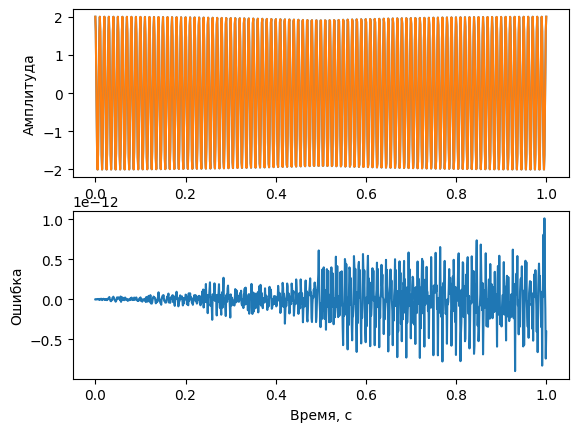

In [112]:
freq = 100
T = 1 / freq
w = 2 * np.pi * freq

def func_cos(t):
    return A * math.cos(w * t) 

cosX_vals, cosY_vals, cosY_vals_approx = plot_approximation(func_cos, x0=0, x1=1)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


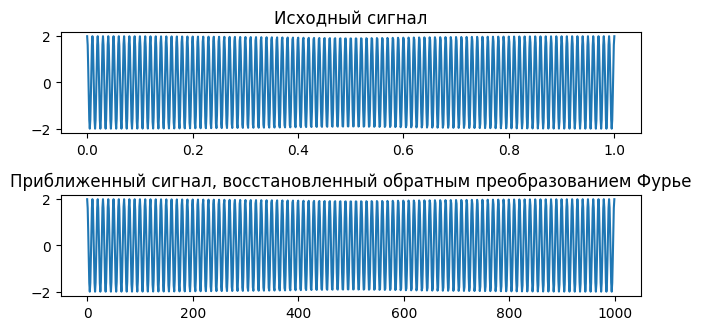

In [113]:
plt.subplot(3, 1, 1)
plt.plot(cosX_vals, cosY_vals)
plt.title('Исходный сигнал')

cos_fft = fft(cosY_vals_approx)
cos_ifft = ifft(cos_fft)

plt.subplot(3, 1, 2)
plt.plot(cos_ifft)
plt.title('Приближенный сигнал, восстановленный обратным преобразованием Фурье')


plt.tight_layout()
plt.show()

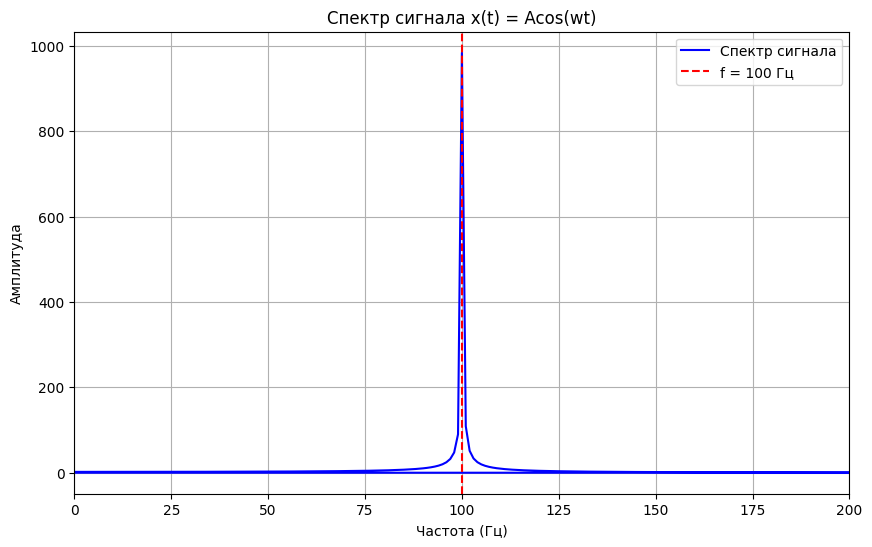

In [114]:
frequencies = fftfreq(len(cosY_vals_approx), 1 / len(cosY_vals_approx))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(cos_fft), 'b-', label='Спектр сигнала')
plt.xlim(0, 200)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала x(t) = Acos(wt)')
plt.axvline(freq, color='r', linestyle='--', label='f = 100 Гц')
plt.legend()
plt.grid(True)
plt.show()

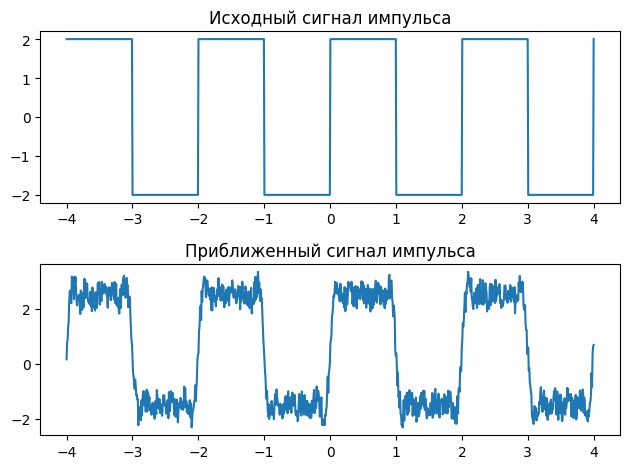

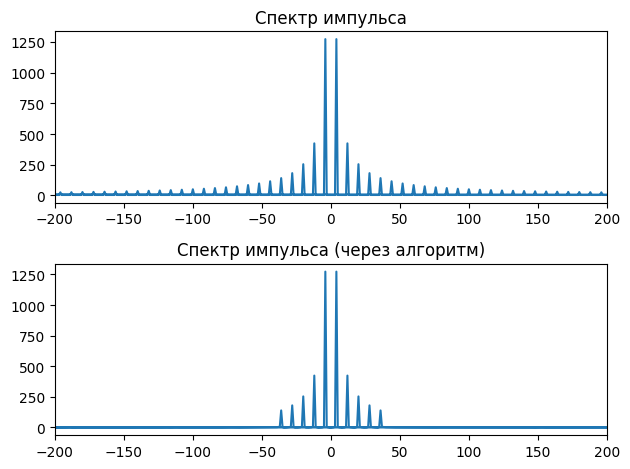

In [115]:
impulse_fft = fft(impulseY_vals)
impulse_fft_approx = fft(impulse_vals_approx)
plt.subplot(2, 1, 1)
plt.plot(impulseX_vals, impulseY_vals)
plt.title('Исходный сигнал импульса')


plt.subplot(2, 1, 2)
# plt.plot(impulseX_vals, impulse_vals_approx)
plt.plot(impulseX_vals, impulse_vals_approx + np.random.random(1000))
plt.title('Приближенный сигнал импульса')
plt.tight_layout()
plt.show()

impulse_freq = fftfreq(len(impulseX_vals), 1 / len(impulseX_vals))
plt.subplot(2, 1, 1)
plt.plot(impulse_freq, np.abs(impulse_fft))
plt.title('Спектр импульса')
plt.xlim(-200,200)
plt.subplot(2, 1, 2)
# plt.plot(impulse_freq ,np.abs(impulse_fft_approx))
plt.plot(impulse_freq ,np.abs(impulse_fft_approx + np.random.random(1000)))
plt.title('Спектр импульса (через алгоритм)')
plt.xlim(-200,200)
plt.tight_layout()
plt.show()